# 데이터 탐색 이해와 실무

## `다변량 시각화`

#### 강의 교안
1. 범주형-범주형 관계의 다변량 시각화
   - 모자이크플롯
2. 범주형-연속형 관계의 다변량 시각화
   - 박스플롯
   - 평행좌표
3. 연속형-연속형 관계의 다변량 시각화
   - 산점도

#### 실습 데이터
- 데이터: Boston Housing Price

#### 실습 시 활용 패키지
- pandas
- numpy
- matplotlib
- seaborn
- statsmodels

## 0. 라이브러리 및 데이터 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# OpenML에서 보스턴 주택 가격 데이터셋을 로드합니다.
boston = fetch_openml(name='boston', version=1)

# 데이터와 타겟을 추출합니다.
data = boston.data
target = boston.target

# 데이터프레임 생성
X = pd.DataFrame(data, columns=boston.feature_names)
y = pd.DataFrame(target, columns=['MEDV'])

# 데이터프레임 병합
housing = pd.merge(X, y, left_index=True, right_index=True, how='inner')

# 결과 출력
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. 범주형-범주형 다변량 시각화
- 모자이크플롯
  - 범주별 조합 그룹 비교 시각화
  - 조합 간의 크기의 우위를 개략적으로 파악하는 것이 목적

In [4]:
housing_data = housing.copy()

In [5]:
# 데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    object  
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(12), object(1)
memory usage: 52.4+ KB


In [8]:
# 데이터 타입 확인
print(housing_data['RAD'].dtype)

# 만약 'RAD'가 Categorical 타입이라면 수치형으로 변환
if pd.api.types.is_categorical_dtype(housing_data['RAD']):
    housing_data['RAD'] = housing_data['RAD'].astype(float)

category


C:\Users\user\AppData\Local\Temp\ipykernel_19752\554338059.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(housing_data['RAD']):


In [9]:
# 실습을 위한 데이터 범주화 진행 (평균 기준)
# 4.3 다변량 비시각화 실습 내용 참고

# 주택가격 (MEDV) 범주화
medv_bins = [0
             , np.mean(housing_data['MEDV'])
             , np.max(housing_data['MEDV'])]
medv_names = ['cheap', 'expensive']
housing_data['MEDV_G'] = pd.cut(housing_data['MEDV'], medv_bins, labels=medv_names)

# INDUS 변수 범주화
indus_bins = [0
              , np.mean(housing_data['INDUS'])
              , np.max(housing_data['INDUS'])]
indus_names = ['INDUS_LOW', 'INDUS_HIGH']
housing_data['INDUS_G'] = pd.cut(housing_data['INDUS'], indus_bins, labels=indus_names)

# RAD 변수 범주화
rad_bins = [0
            , np.mean(housing_data['RAD'])
            , np.max(housing_data['RAD'])]
rad_names = ['RAD_LOW', 'RAD_HIGH']
housing_data['RAD_G'] = pd.cut(housing_data['RAD'], rad_bins, labels=rad_names)

In [10]:
# 모자이크플롯 시각화 패키지 로딩
from statsmodels.graphics.mosaicplot import mosaic

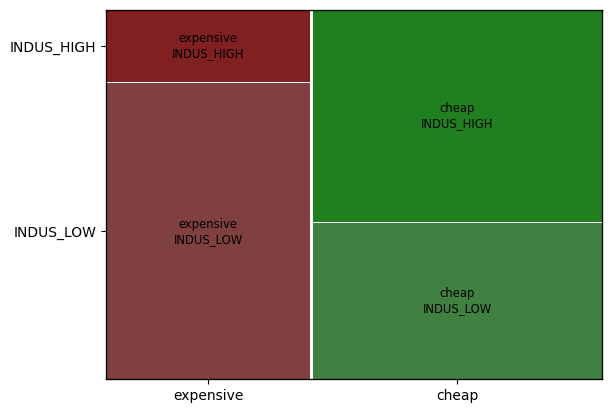

In [11]:
# 2개 범주 시각화
# 타겟변수 주택가격 범주화 INDUS 범주 간 모자이크 플롯
mosaic(housing_data, ['MEDV_G', 'INDUS_G'])
plt.show()

- cheap & INDUS_HIGH 조합을 지닌 데이터의 비중이 cheap & INDUS_LOW 조합을 지닌 비중보다 다소 많게 나타남
- expensive & INDUS_HIGH 조합을 지닌 데이터의 비중이 expensive & INDUS_LOW 조합을 지닌 비중보다 적게 나타남

- 즉, 주택 가격이 평균 대비 낮은 지역들 중 (cheap 범주) 상업지구 비중이 적은 지역의 비중이 다소 많아 보임
- 이와 반대로, 주택 가격이 평균 대비 높은 지역 중 (expensive 범주) 상업지구 비중이 많은 지역의 비중이 크게 많아 보임

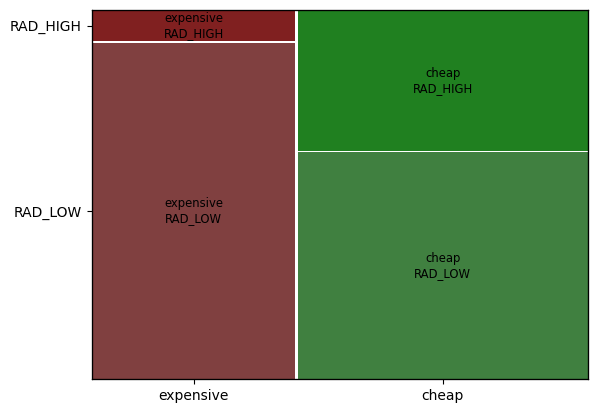

In [13]:
# 타겟변수 주택가격 범주와 고속도로 접근성 지수 비중 범주 간 모자이크 플롯
mosaic(housing_data, ['MEDV_G', 'RAD_G'])
plt.show()

- cheap & - INDUS_HIGH 조합을 지닌 데이터의 비중이 cheap & INDUS_LOW 조합을 지닌 비중보다 적게 나타남
- expensive & INDUS_HIGH 조합을 지닌 데이터의 비중이 expensive & INDUS_LOW 조합을 지닌 비중보다 적게 나타남

- 즉, 가격이 평균 대비 낮은 지역에서 고속도로 접근성 지수가 떨어지는 지역의 비중이 다소 많음
- 또한, 가격이 평균 대비 높은 지역에서 고속도로 접근성 지수가 떨어지는 지역의 비중이 크게 많아 보임

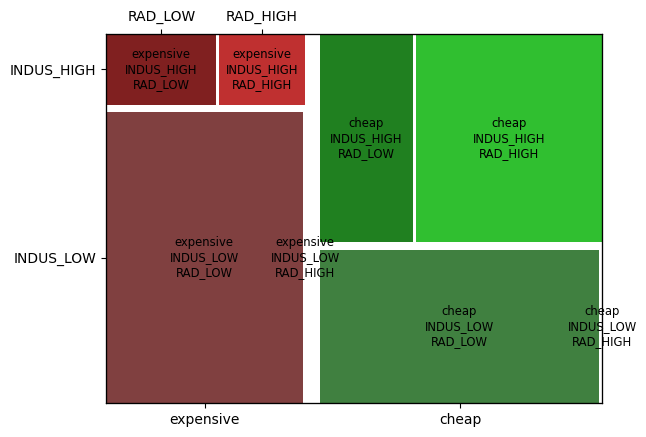

In [15]:
# 3개 범주 시각화
# 타겟변수 주택가격 범주와 비상업지구 정도 및 고속도로 접근성 정도 범주 간 모자이크플롯
mosaic(housing_data, ['MEDV_G', 'INDUS_G', 'RAD_G'], gap = 0.03)
plt.show()

- 가격이 평균 대비 높은 지역 중(expensive), 상업지역 비중이 많고(INDUS_LOW), 고속도로 접근성이 떨어진 경우의 비중이 두드러지게 나타남을 확인
- 이처럼 범주별 조합 간의 비중을 수치가 아닌 모자이크플롯 기반의 시각화로 표현하여 개략적인 데이터 구성 확인 가능

## 2. 범주형-연속형 다변량 시각화
- 박스플롯
- 평행좌표
  - 범주별 요약통계량 및 경향성을 개략적으로 파악을 위한 시각화

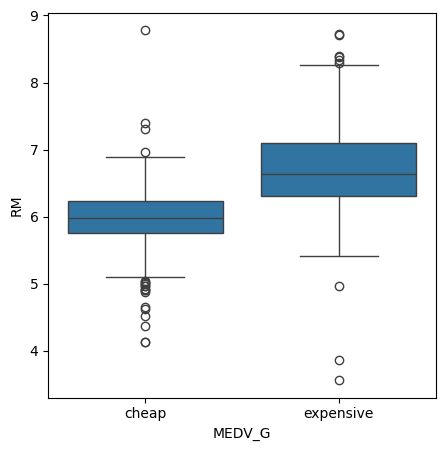

In [16]:
# Box plot 시각화
# 주택 가격 범주별 평균 방의 개수 요약 통계량 도출
plt.figure(figsize = (5, 5))
sns.boxplot(data = housing_data, x='MEDV_G', y='RM')
plt.show()

- 주택가격이 평균대비 낮은 지역들의 평균 방의 개수는, 주택가격이 평균대비 높은 지역들보다 중앙값을 비롯하여 전반적으로 낮음

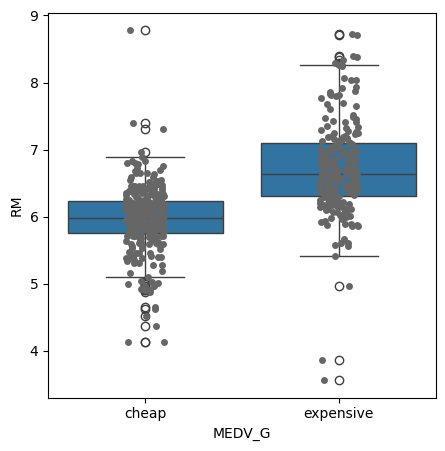

In [17]:
# Box plot 시각화
# 데이터 관측치별 위치 point 추가
plt.figure(figsize = (5, 5))
sns.boxplot(x='MEDV_G', y='RM', data = housing_data)
sns.stripplot(x='MEDV_G', y='RM', data = housing_data, color = '0.4')
plt.show()

- 각 관측치 위치를 점으로 함께 표현하여 데이터 분포 파악
- 주택가격이 평균 대비 낮은 지역의 평균 방의 개수는 약 6의 중앙값, 가격이 평균 대비 높은 지역의 평균 방의 개수는 약 6.5에 가까움
- 즉, 주택가격이 평균 대비 낮은 지역보다 높은 지역들의 방의 개수가 많음을 확인

In [18]:
# 평행좌표 실습을 패키지 로딩
from pandas.plotting import parallel_coordinates

- 변수 간략 의미 정리
1. CRIM: 범죄율
2. AGE: 주택연식
3. INDUS: 상업지역 비중
4. RAD: 고속도로 접근성
5. RM: 평균 방의 개수

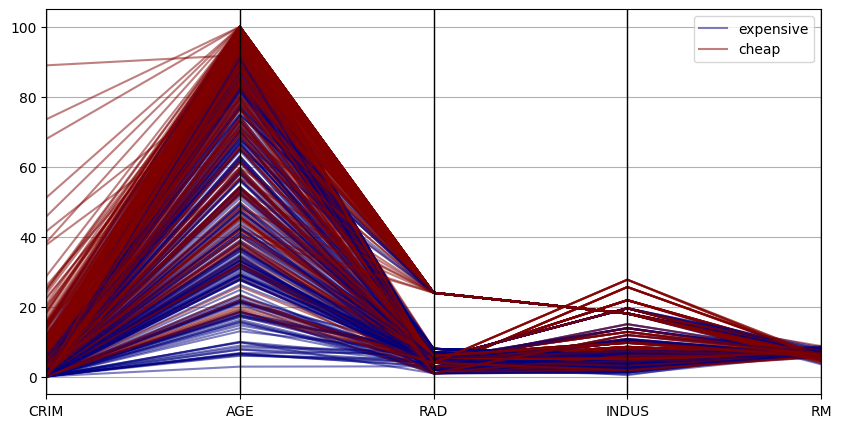

In [21]:
# 데이터 일부 선택
sub_data = housing_data[['CRIM', 'AGE', 'RAD', 'INDUS', 'RM', 'MEDV_G']]

# 평행좌표 실습
plt.figure(figsize=(10, 5))
parallel_coordinates(sub_data, 'MEDV_G', colormap = plt.get_cmap('jet'), alpha =0.5)
plt.show()

- 주택 평균 가격이 낮은 경우의 경향 요약(자주색)
  - 범죄율이 높음(CRIM)
  - 오래된 연식이 주택이 많음(AGE)
  - 방의 개수가 적음(RM) 

- 컬럼별 범위가 서로 다르기 때문에, 다른 컬럼에서 잘 결과가 나오지 않은 것 같아서
- 범위를 조정하여 주택가격이 높고 낮은 범주별 차이를 명확하게 파악

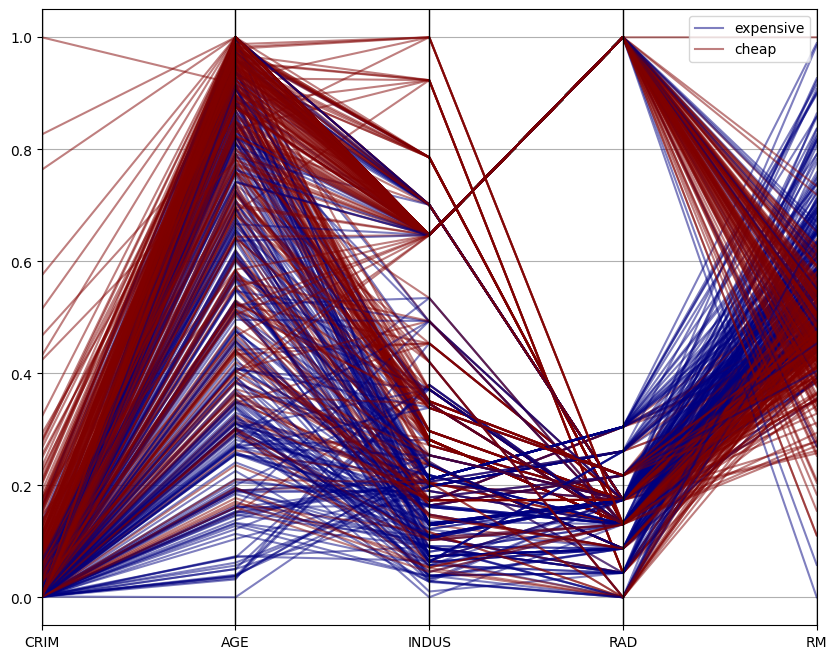

In [22]:
# 데이터 값의 위치를 파악할 수 있는 Min-Max Scaling 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = sub_data[['CRIM', 'AGE', 'INDUS', 'RAD', 'RM']]
x_norm = pd.DataFrame(scaler.fit_transform(x_df), columns = ['CRIM', 'AGE', 'INDUS', 'RAD', 'RM'])

sub_data_scale = pd.merge(x_norm, sub_data[['MEDV_G']], left_index = True, right_index = True, how = 'inner')

# Scaling한 데이터로 평행좌표 실습
plt.figure(figsize=(10, 8))
parallel_coordinates(sub_data_scale, 'MEDV_G', colormap = plt.get_cmap('jet'), alpha = 0.5)
plt.show()

- 주택 평균 가격이 낮은 경우의 경향 요약 (자주색)
    1) 범죄율이 높은 경향
    2) 오래된 연식의 주택의 비율이 Town 내 많음
    3) 상업지역의 비중이 비교적 적음
    4) 고속도로의 접근성 지수가 비교적 높음
    5) 방의 개수가 적음
- 이처럼 타겟 변수의 범주별 데이터 경향성 파악은 평행좌표 시각화를 통해 파악 가능

## 3. 연속형-연속형 다변량 시각화
- 산접도
  - 연속형 변수 간 관계를 개략적으로 파악하기 위한 시각화
  - 변수 간 선형성 및 양과 음의 관계성 등을 파악 가능

In [24]:
# 데이터 copy
housing_data = housing.copy()
# 데이터 설명에 따라 CHAS 컬럼을 범주형 데이터로 변환
housing_data = housing_data.astype({'CHAS':'object'})

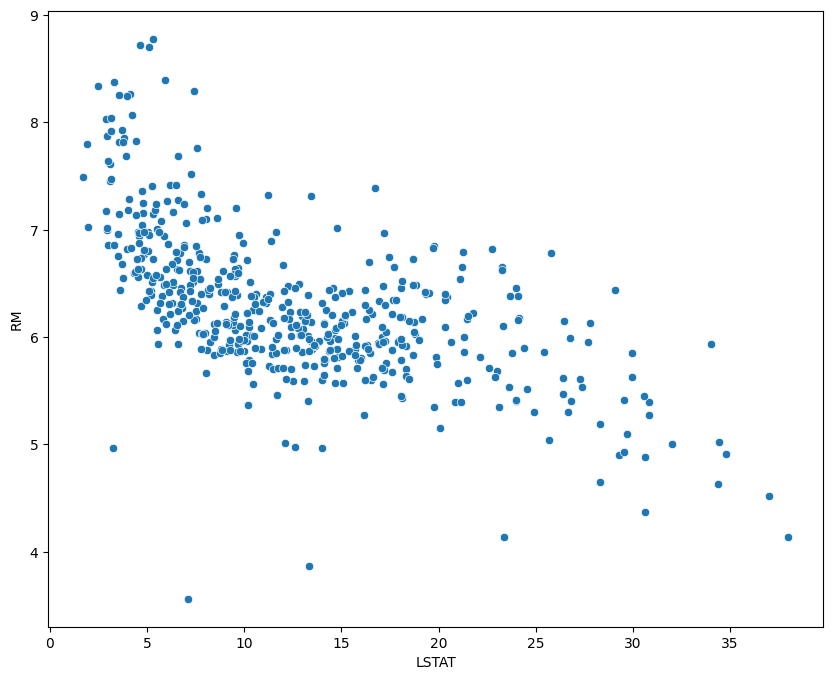

In [25]:
# 하위 계층 비율과 평균 방의 개수간 상관관계 확인
plt.figure(figsize=(10, 8))
sns.scatterplot(x='LSTAT', y='RM', data=housing_data)
plt.show()

In [26]:
import scipy.stats as stats
stats.pearsonr(housing_data.LSTAT, housing_data.RM)

PearsonRResult(statistic=-0.6138082718663956, pvalue=1.0330091329657501e-53)

- 방의 개수가 적을수록, 하위계층의 비율이 높은 음의 상관관계를 보임
- 약간의 선형관계성을 보이며, 일부 잠재적 이상치가 존재함

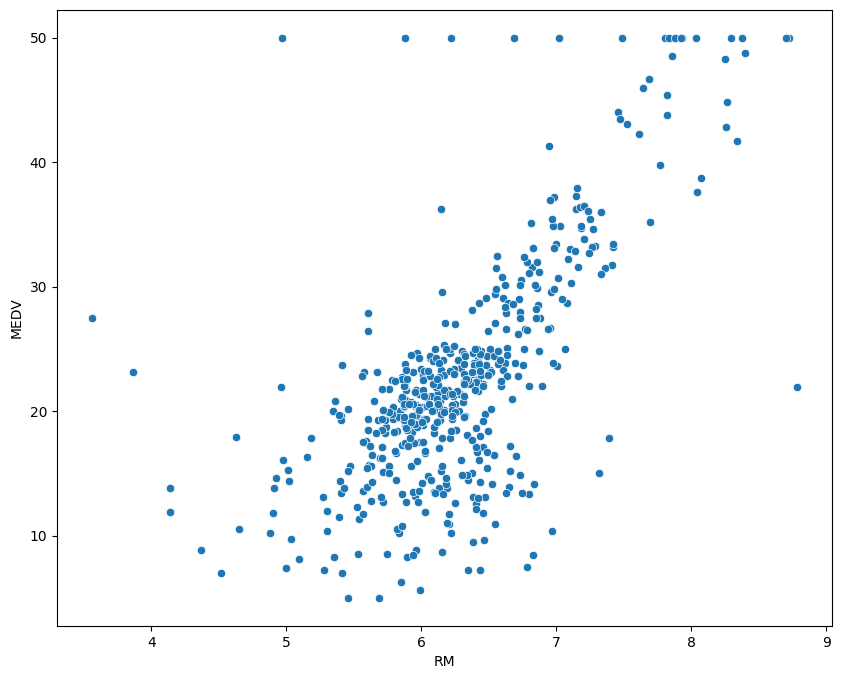

In [27]:
# 평균 방의 개수 및 주택 가격 간 상관관계 확인
plt.figure(figsize=(10, 8))
sns.scatterplot(x='RM', y='MEDV', data = housing_data)
plt.show()

- 방의 개수가 많을수록, 주택가격이 높아지는 양의 상관관계를 보임
- 대체로 선형관계성을 보이는 관측치로 보이나, 일부 잠재적 이상치가 존재함

In [28]:
stats.pearsonr(housing_data.MEDV, housing_data.RM)

PearsonRResult(statistic=0.6953599470715394, pvalue=2.487228871008081e-74)

## 3-1. 다양한 상관관계의 정도를 시각화하는 방안: Heatmap
- 본래 Heatmap은 범주형 자료의 범주별로 연속형 자료를 집계한 자료를 사용하여 (혹은 2개 범주형 변수 조합별 빈도 집계), 집계한 값에 비례하여 색깔을 다르게 해서 2차원으로 자료를 시각화하는 영역에 활용
- 연속형 자료이나, 테이블 내 많은 조합 간 상관관계의 강도 및 정도의 강약을 Heatmap으로 시각화하여 쉽게 파악 가능
  - 컬럼별 조합: 범주별 조합
  - 컬럼별 상관계수: 범주별 강도(빈도와 유사한 수치적 표현)

In [30]:
# 모든 컬럼 간 상관관계 도출
# 4.3 다변량 비시각화 교안 참고
np.round(housing_data.corr(), 2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


- 변수가 13개인 경우 13x13인, 총 169개의 cell 값 도출
- 변수가 많아질 경우, 모든 컬럼 간 상관관계를 한눈에 파악하기 쉽지 않음
- 이러한 상황의 대안의 시각화 방안 존재
  - 히트맵: 다변량 데이터를 활용하여 행과 열 그리고 색상을 활용해서 테이블을 구성하여 특정 영역의 패턴 전체적으로 시각화

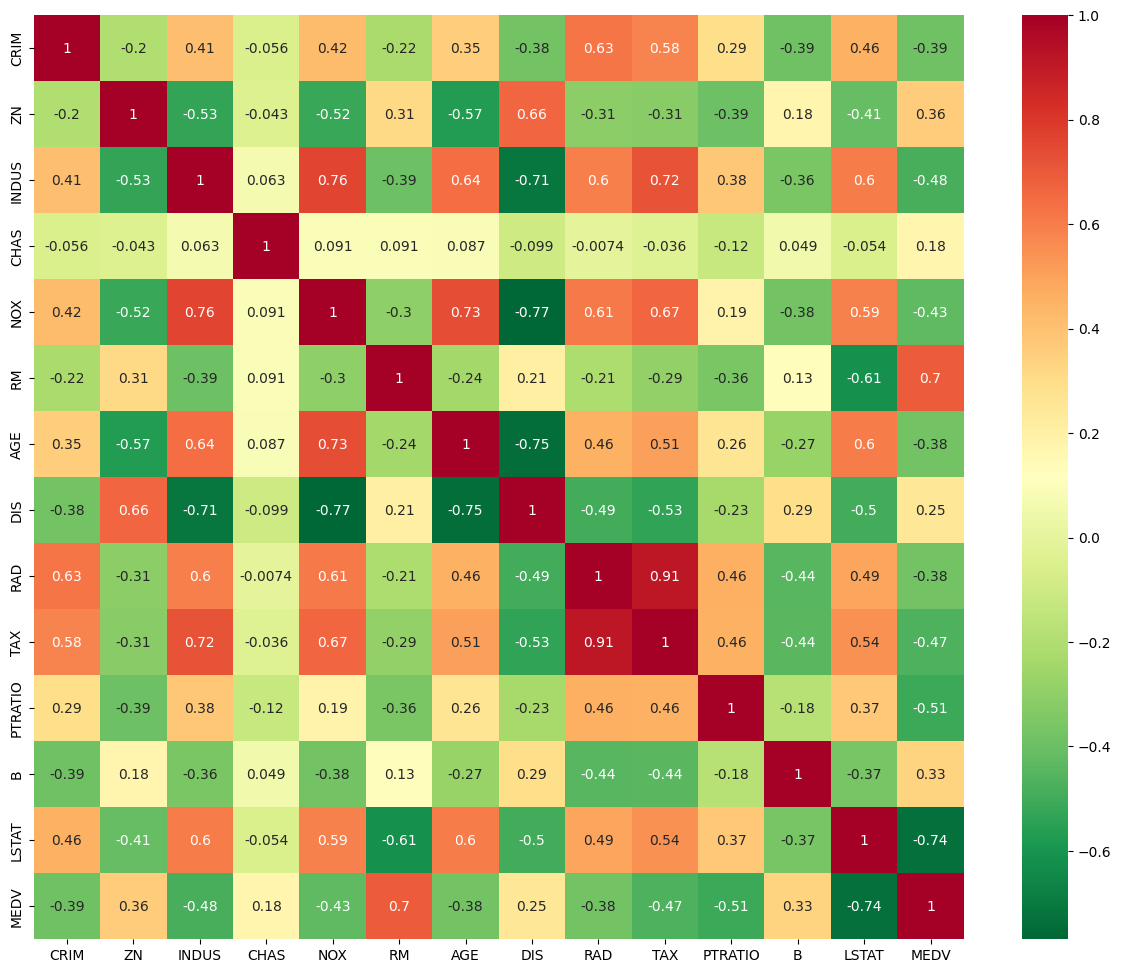

In [31]:
# 상관계수 데이터프레임을 Heatmap으로 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(housing_data.corr(), annot=True, cmap='RdYlGn_r')
plt.show()

- 빨간색 혹은 초록색으로 짙어지는 경우 양/음의 방향의 상관관계가 높음을 확인
- 색상에 따라 비교적 빠르게 데이터 개별 컬럼 간 밀접함을 개략적으로 파악 가능

- 기존 Heatmap 활용 영역
- 범주별 빈도를 집계한 (Ex.피벗 테이블) 자료의 시각화에 유용

In [33]:
# 범주별 빈도를 Heatmap 시각화를 위해 샘플테이블 생성
sample_data = {
    'city': ['seoul', 'seoul', 'seoul', 'newyork', 'newyork', 'newyork', 'london', 'london', 'london'],
    'year': ['2020', '2021', '2022', '2020', '2021', '2022', '2020', '2021', '2022'],
    'visitor': [998712, 873164, 124502, 3376442, 2478621, 874510, 2129451, 1878551, 688781],
    }
columns = ['city', 'year', 'visitor']
sample_df = pd.DataFrame(sample_data, columns=columns)
sample_df

,city,year,visitor
0,seoul,2020,998712
1,seoul,2021,873164
2,seoul,2022,124502
3,newyork,2020,3376442
4,newyork,2021,2478621
5,newyork,2022,874510
6,london,2020,2129451
7,london,2021,1878551
8,london,2022,688781


In [35]:
# 데이터 pivot
pivot_df = sample_df.pivot(index='city', columns='year', values='visitor')
pivot_df


year,2020,2021,2022
city,,,
london,2129451,1878551,688781
newyork,3376442,2478621,874510
seoul,998712,873164,124502


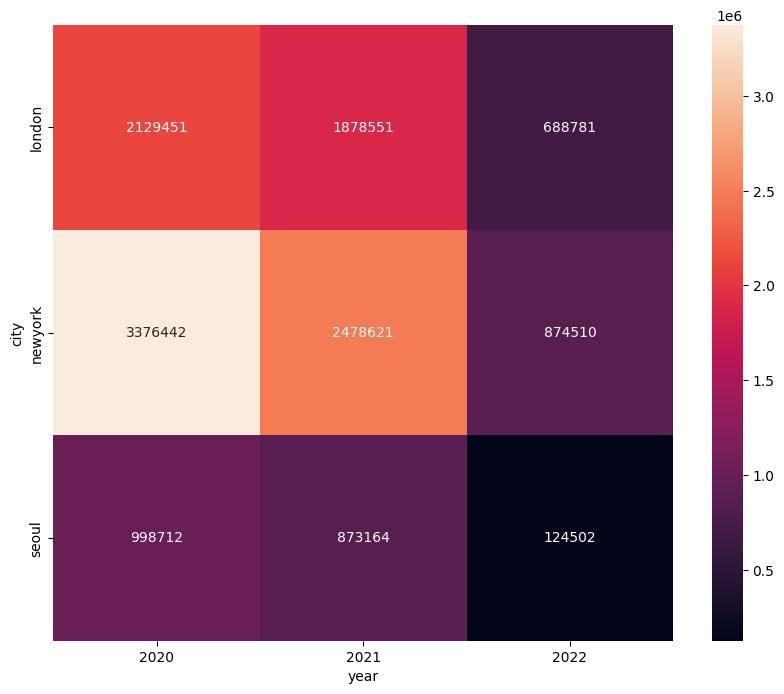

In [36]:
# pivot 테이블을 Heatmap으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df
            , annot=True ## 빈도수
            , fmt='d' ## 빈도의 정수 표현
           )
plt.show()

- 범주별 연속형 변수의 수치를 히트맵으로 표현하여 각 셀(Cell)의 강도를 색상으로 표현하여 차이를 파악하기 쉽게 함